<a href="https://colab.research.google.com/github/HaixinLiuNeuro/neuromatch-compneuro-2022-project/blob/development/GetFeatureDatafromCalTechDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# init
import os
import json
import numpy as np
import pandas as pd

In [2]:
# download from Caltech server
# @title Download and unzip the data
import os, requests, zipfile

fname = 'task1.zip'
url = "https://data.caltech.edu/tindfiles/serve/a86f4297-a087-4f40-9ed4-765779105c2c/"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)
else:
  print('Data have already been downloaded!!!')

if not os.path.exists('task1_classic_classification'):
  # Unzip the file
  with zipfile.ZipFile(fname, 'r') as zip_ref:
    zip_ref.extractall('.')


# Download the script
fname = 'calms21_convert_to_npy.py'
url = "https://data.caltech.edu/tindfiles/serve/ca84a583-ea06-440a-995c-c184bcb0291c/"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [3]:
# unpack the data
!python calms21_convert_to_npy.py  --input_directory '.' --output_directory '.'
!python calms21_convert_to_npy.py  --input_directory '.' --output_directory '.' --parse_treba

Saving ./calms21_task1_test
tcmalloc: large alloc 1224941568 bytes == 0x4ee80000 @  0x7fde1c48f1e7 0x4a3940 0x5b438c 0x5ea94f 0x5939cb 0x594cd3 0x5d0ecb 0x5939af 0x594cd3 0x594f8e 0x59526e 0x5bfba0 0x59aeca 0x515655 0x549e0e 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x5118f8 0x593dd7 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2 0x64fc4e 0x7fde1c08cc87
tcmalloc: large alloc 1224941568 bytes == 0x97eb2000 @  0x7fde1c48f1e7 0x4a3940 0x52ab72 0x527cf3 0x51d358 0x59358d 0x548c51 0x51566f 0x549576 0x4bcb19 0x59c019 0x59588e 0x595e64 0x4d8924 0x5bfbcb 0x59aeca 0x515655 0x549e0e 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x5118f8 0x593dd7 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206
Saving ./calms21_task1_train
Saving ./calms21_task1_test_features
tcmalloc: large alloc 1224941568 bytes == 0xcf22000 @  0x7f50bbfde1e7 0x4a3940 0x5b438c 0x5ea94f 0x5939cb 0x594cd3 0x5d0ecb 0x5939af 0x594cd3 0x594f8e 0x59526e 0x5bfba0 0x59aeca 0x515655 0x549e0e 0x593fce 0x548ae9 0x51

In [4]:
# load data function
def load_task1_data(data_path):
  """
  Load data for task 1:
      The vocaubulary tells you how to map behavior names to class ids;
      it is the same for all sequences in this dataset.
  """
  data_dict = np.load(data_path, allow_pickle=True).item()
  dataset = data_dict['annotator-id_0']
  # Get any sequence key.
  sequence_id = list(data_dict['annotator-id_0'].keys())[0]
  vocabulary = data_dict['annotator-id_0'][sequence_id]['metadata']['vocab']
  return dataset, vocabulary


In [5]:
# load the data containing task programming features
training_data_fea, vocab_fea = load_task1_data('./calms21_task1_train_features.npy')
# test_data_fea, _ = load_task1_data('./calms21_task1_test_features.npy') # currently we do not need this 

features: pre-computed features from a model trained with task programming on the trajectory data of the CalMS21 unlabeled videos set.
Dimensions: (# frames) x (feature dim = 32).
However, the feature data is 60 dim. Currently, just save them all

In [112]:
# put into a data frame variable
task_feature_df = pd.DataFrame({'frame_num':[], 'session_num': [], 'annotations':[]})
training_tskfea_df = pd.DataFrame(training_data_fea)
for idx, session in enumerate(training_tskfea_df.columns):
  session_df = pd.DataFrame()
  session_df['annotations']=training_tskfea_df[session]['annotations']
  session_df['session_num'] = idx
  session_df['frame_num'] = range(len(training_tskfea_df[session]['annotations']))
  for x in range(60): # because we checked that there are 60 dim in the feature data
    a = str(x)    
    print(x)
    print(a)
    fea_name = ['Fea', a]    # print(tmp)
    fea_name=''.join(fea_name)
    session_df[fea_name] = training_tskfea_df[session]['features'][:,x]
  task_feature_df = task_feature_df.append(session_df, ignore_index=True)

In [120]:
# save task_feature_df
task_feature_df.to_csv('task_feature_df.csv')

# the 'task_feature_df.csv' file is saved to our google drive

In [122]:
task_feature_df.head()

,frame_num,session_num,annotations,Fea0,Fea1,Fea2,Fea3,Fea4,Fea5,Fea6,...,Fea50,Fea51,Fea52,Fea53,Fea54,Fea55,Fea56,Fea57,Fea58,Fea59
0,0.0,0.0,3.0,831.659204,805.659204,775.659204,780.659204,711.659204,711.659204,643.659204,...,0.201271,-1.686340,-0.170703,0.215731,0.251000,0.227394,0.221438,-0.341884,-0.258297,0.247844
1,1.0,0.0,1.0,833.050439,809.050439,778.050439,783.050439,723.050439,717.050439,644.050439,...,0.240914,-1.253083,-0.135972,0.246578,0.284343,0.260936,0.256414,-0.275257,-0.288740,0.288741
2,2.0,0.0,1.0,838.718976,816.718976,776.718976,787.718976,730.718976,713.718976,646.718976,...,0.267423,-0.375269,-0.001808,0.268099,0.302942,0.285639,0.274443,-0.085661,-0.299937,0.309663
3,3.0,0.0,1.0,826.757507,815.757507,774.757507,785.757507,743.757507,711.757507,644.757507,...,0.224883,0.709808,-0.099615,0.260069,0.291605,0.270890,0.252054,0.117812,-0.249731,0.304101
4,4.0,0.0,1.0,822.045709,812.045709,768.045709,779.045709,749.045709,709.045709,646.045709,...,0.203512,1.831389,-0.167013,0.261911,0.262023,0.235552,0.209837,0.161930,-0.224229,0.255363


#Below is playground to take a look at the features (sanity check)

In [22]:
# playground to take a look at the feature data

# get one session to take a look
idx = 0
session = training_tskfea_df.columns[0]
# session_df = pd.DataFrame()
# session_df['annotations']=training_df[session]['annotations']

tmp = training_tskfea_df[session]['features']
tmp_anno = training_tskfea_df[session]['annotations']

In [10]:
tmp.shape

(21364, 60)

In [12]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import rc
import matplotlib.patches as mpatches

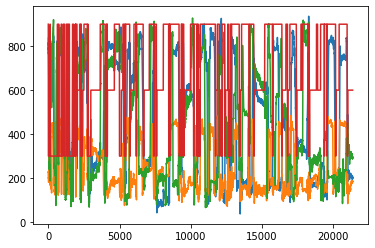

In [25]:
plt.plot(tmp[:,[1, 10, 20]])
plt.plot(tmp_anno*300)